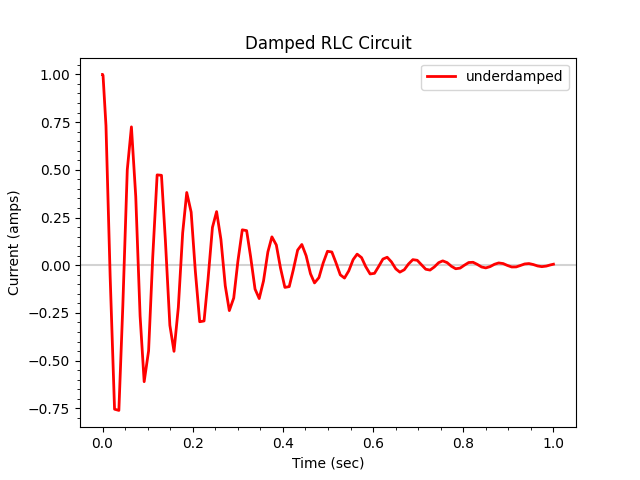

In [1]:
"""rlc_circuit.ipynb"""

# This code plots the current over time flowing through an RLC circuit that maintains a constant DC voltage.

# Code is modified from that given by Dr. David Biersach in damped_pendulum.ipynb. 

# Cell 1 

# Allows for type hinting
from __future__ import annotations
# Used for type hinting
import typing
# Used for plotting
import matplotlib.pyplot as plt
# Used for calculations
import numpy as np
# Used for graph tick marks 
from matplotlib.ticker import AutoMinorLocator
# scipy uses rk4 with minor improvements from Fehlberg, called rkf4.5 
    # considered the most accurate model we have 
from scipy.integrate import solve_ivp  # type: ignore

if typing.TYPE_CHECKING:
    # Allows for type hinting for any,axes, and arrays 
    from typing import Any
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget

# fmt: off
def model(time: float,state_vector: tuple[float, float],
    phase_constant: float, damping_constant: float) -> tuple[float, float]:
    """Model the system of diff eqs"""
    # Initialize the omega and current variables as floats 
    omega: float
    i: float
    # always pack up so omega is first, current is second 
    omega, i = state_vector  # unpack dependent variables
    # calculate omega and current 1st order diff eqs 
        # d_omega now has a damping constant -> underdamped 
    d_omega: float = -damping_constant * omega - phase_constant * i
    d_I: float = omega
    # return a tuple in the same order the variables were packed
    return d_omega, d_I
# fmt: on


def plot(ax: Axes) -> None:
    """Plot current vs time"""

    # Define the constants 
    R: float = 0.1 # ohms 
    L: float = 0.01 # Henries 
    C: float = 0.01 # farads

    # Ultimately, we're solving d(omega)dt= -R/L(omega)-1/LC(I) and dI/dt= omega 

    # Precalculate phase constant
    phase_constant: float = 1/(L*C)

    # Set damping_constant-> underdamped 
    underdamped_constant: float = R/L
    

    # Set initial conditions
    omega_initial: float = 0
    I_initial: float = 1  # amp

    # Set model duration (seconds)
    time_initial: float = 0
    # run to 1 second
    time_final: float = 1

    

    # Calculate for an underdamped rlc circuit 
    # Invoke Scipy Initial Value Problem (ivp) Solver
        # call solve_ivp-> initial value problem 
        # parameters (pattern is the same for everything)
            # 1st name of function we will use (convention name is model-> because we're modeling our system of diff eq's)
            # 2nd thing (square brackets)-> list of initial conditions of the dependent variable (initial omega, initial current)
            # 3rd optional parameter to control how big of a time step it can take 
            # args-> list of optional parameters, used for constants 
    sol: Any = solve_ivp(
        model,
        (time_initial, time_final),
        [omega_initial, I_initial],
        max_step=0.01,
        args=[phase_constant, underdamped_constant],
    )
    # sol.t= array of all the time steps it took from initial to final 
    time_steps: NDArray[np.float_] = np.array(sol.t, dtype=np.float_)
    #sol.y[1]-> we're only going to plot the currents, we don't care about the omega's for now
    I_underdamped: NDArray[np.float_] = np.array(sol.y[1], dtype=np.float_)

    # plot I and the time stamps in red 
    # fmt: off
    ax.plot(time_steps, I_underdamped, label="underdamped",
             color="red", linestyle="solid", linewidth=2, zorder=3)
  
             
    # fmt: on
    # set title 
    ax.set_title("Damped RLC Circuit")
    # set x and y axis labels 
    ax.set_xlabel("Time (sec)")
    ax.set_ylabel(f"Current (amps)")
    # set x axis line
    ax.axhline(y=0.0, color="lightgray")
    # set tick marks 
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    # set legend 
    ax.legend(loc="upper right")


def main() -> None:
    """Define an entry point for the function"""
    # Open a new figure, call the plot helper function, show the plot 
    plt.close("all")
    plt.figure(" ")
    plot(plt.axes())
    plt.show()

# call the main function 
main()